In [ ]:
import numpy as np
import torch
from torch import nn
from torch.utils import data
import matplotlib.pyplot as plt
from eegnet_repl.model import EEGNet, train, test
from eegnet_repl.config import Paths
from eegnet_repl.dataset import build_dataset_from_preprocessed_2
from eegnet_repl.ui import plot_spatial_filters, plot_power_spectra_of_temporal_filters

2026-01-27 17:44:06,603 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-27 17:44:06,604 - __init__.py - <module> - DEBUG - Creating converter from 5 to 7
2026-01-27 17:44:06,605 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-27 17:44:06,606 - __init__.py - <module> - DEBUG - Creating converter from 5 to 7
2026-01-27 17:44:06,825 - base.py - __new__ - DEBUG - No description found for dataset BaseDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-27 17:44:06,826 - base.py - __new__ - DEBUG - No description found for dataset BaseBIDSDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-27 17:44:06,827 - base.py - __new__ - DEBUG - No description found for dataset LocalBIDSDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-27 17:44:06,828 - base.py - __new__ - DEBUG - No description found for dataset CompoundDataset. Complete the appropriate moabb/datasets/summary_*.

In [2]:
subject = 3

In [3]:
dataset = build_dataset_from_preprocessed_2(src='kaggle',subject=subject,mode='Train')

2026-01-27 17:44:07,476 - dataset.py - build_dataset_from_preprocessed_2 - INFO - Building dataset from preprocessed data in D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train
2026-01-27 17:44:07,477 - dataset.py - build_dataset_from_preprocessed_2 - INFO - Found 1 preprocessed files for subject 3


Opening raw data file D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train\A03T-preprocessed.fif...
    Range : 0 ... 338190 =      0.000 ...  2642.109 secs
Ready.
Reading 0 ... 338190  =      0.000 ...  2642.109 secs...
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 257 original time points ...
0 bad epochs dropped


D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\src\eegnet_repl\dataset.py:174: RuntimeWarning: This filename (D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train\A03T-preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  pp = mne.io.read_raw_fif(src_path, preload=True)


In [4]:
generator = torch.Generator().manual_seed(42)
train_data, val_data = data.random_split(dataset=dataset,lengths=[0.9,0.1], generator=generator)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = data.DataLoader(val_data, batch_size=64, shuffle=False)

In [5]:
model = EEGNet(C=dataset.X.shape[1], T=dataset.X.shape[2])
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(
    params = model.parameters(),
    eps=1e-07,
    foreach=None, # default, "If memory is prohibitive, batch fewer parameters through the optimizer at a time or switch this flag to False"
    fused=None, # default, "To force running the for-loop implementation, pass False for either foreach or fused."
    )

In [6]:
best_model, train_losses, val_losses = train(model, optimizer, loss_fn, train_loader, val_loader, nepochs=500)

Training on cpu device


d:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\.eegnetenv\Lib\site-packages\torch\nn\modules\conv.py:543: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv2d(


Epoch: 1/500..  Training Loss: 1.447..  Validation Loss: 1.477.. 
Epoch: 51/500..  Training Loss: 1.116..  Validation Loss: 1.150.. 
Epoch: 101/500..  Training Loss: 0.856..  Validation Loss: 0.932.. 
Epoch: 151/500..  Training Loss: 0.873..  Validation Loss: 0.885.. 
Epoch: 201/500..  Training Loss: 0.698..  Validation Loss: 0.630.. 
Epoch: 251/500..  Training Loss: 0.515..  Validation Loss: 0.794.. 
Epoch: 301/500..  Training Loss: 0.500..  Validation Loss: 0.474.. 
Epoch: 351/500..  Training Loss: 0.487..  Validation Loss: 0.315.. 
Epoch: 401/500..  Training Loss: 0.386..  Validation Loss: 0.557.. 
Epoch: 451/500..  Training Loss: 0.342..  Validation Loss: 0.409.. 


2026-01-27 17:46:22,116 - pyplot.py - switch_backend - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


2026-01-27 17:46:22,122 - pyplot.py - switch_backend - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2026-01-27 17:46:22,129 - font_manager.py - _findfont_cached - DEBUG - findfont: Matching serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2026-01-27 17:46:22,132 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='d:\\!Studying\\NeuroData\\DS_n_advanced_python\\HW\\Final_project_DS\\code\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2026-01-27 17:46:22,133 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='d:\\!Studying\\NeuroData\\DS_n_advanced_python\\HW\\Final_project_DS\\code\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGener

Text(0, 0.5, 'Loss')

2026-01-27 17:46:22,779 - font_manager.py - _findfont_cached - DEBUG - findfont: Matching serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
2026-01-27 17:46:22,780 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='d:\\!Studying\\NeuroData\\DS_n_advanced_python\\HW\\Final_project_DS\\code\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2026-01-27 17:46:22,781 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='d:\\!Studying\\NeuroData\\DS_n_advanced_python\\HW\\Final_project_DS\\code\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2026-01-27 17:46:22,782 - font_manager.py

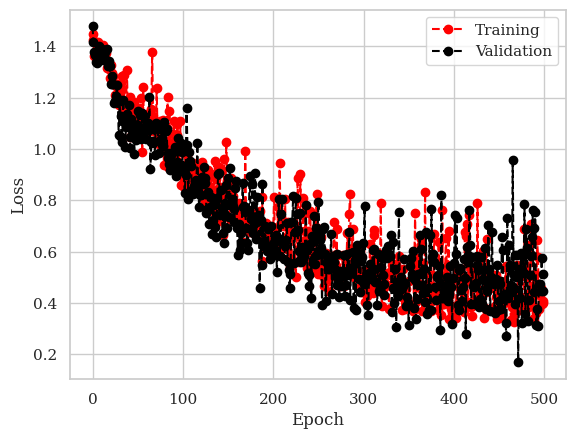

In [7]:
plt.plot(np.arange(len(train_losses)),train_losses,'ro--')
plt.plot(np.arange(len(val_losses)),val_losses,'ko--')
plt.legend(labels=['Training','Validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [8]:
test_dataset = build_dataset_from_preprocessed_2(src='kaggle',subject=subject,mode='Eval')

2026-01-27 17:46:23,512 - dataset.py - build_dataset_from_preprocessed_2 - INFO - Building dataset from preprocessed data in D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Eval
2026-01-27 17:46:23,513 - dataset.py - build_dataset_from_preprocessed_2 - INFO - Found 1 preprocessed files for subject 3


Opening raw data file D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Eval\A03E-preprocessed.fif...
    Range : 0 ... 332172 =      0.000 ...  2595.094 secs
Ready.
Reading 0 ... 332172  =      0.000 ...  2595.094 secs...
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('783')]
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 257 original time points ...


D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\src\eegnet_repl\dataset.py:174: RuntimeWarning: This filename (D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Eval\A03E-preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  pp = mne.io.read_raw_fif(src_path, preload=True)


0 bad epochs dropped


In [9]:
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [10]:
test_loss = test(model,test_loader,loss_fn)

Testing on cpu device


In [11]:
test_loss

0.5779465079307556

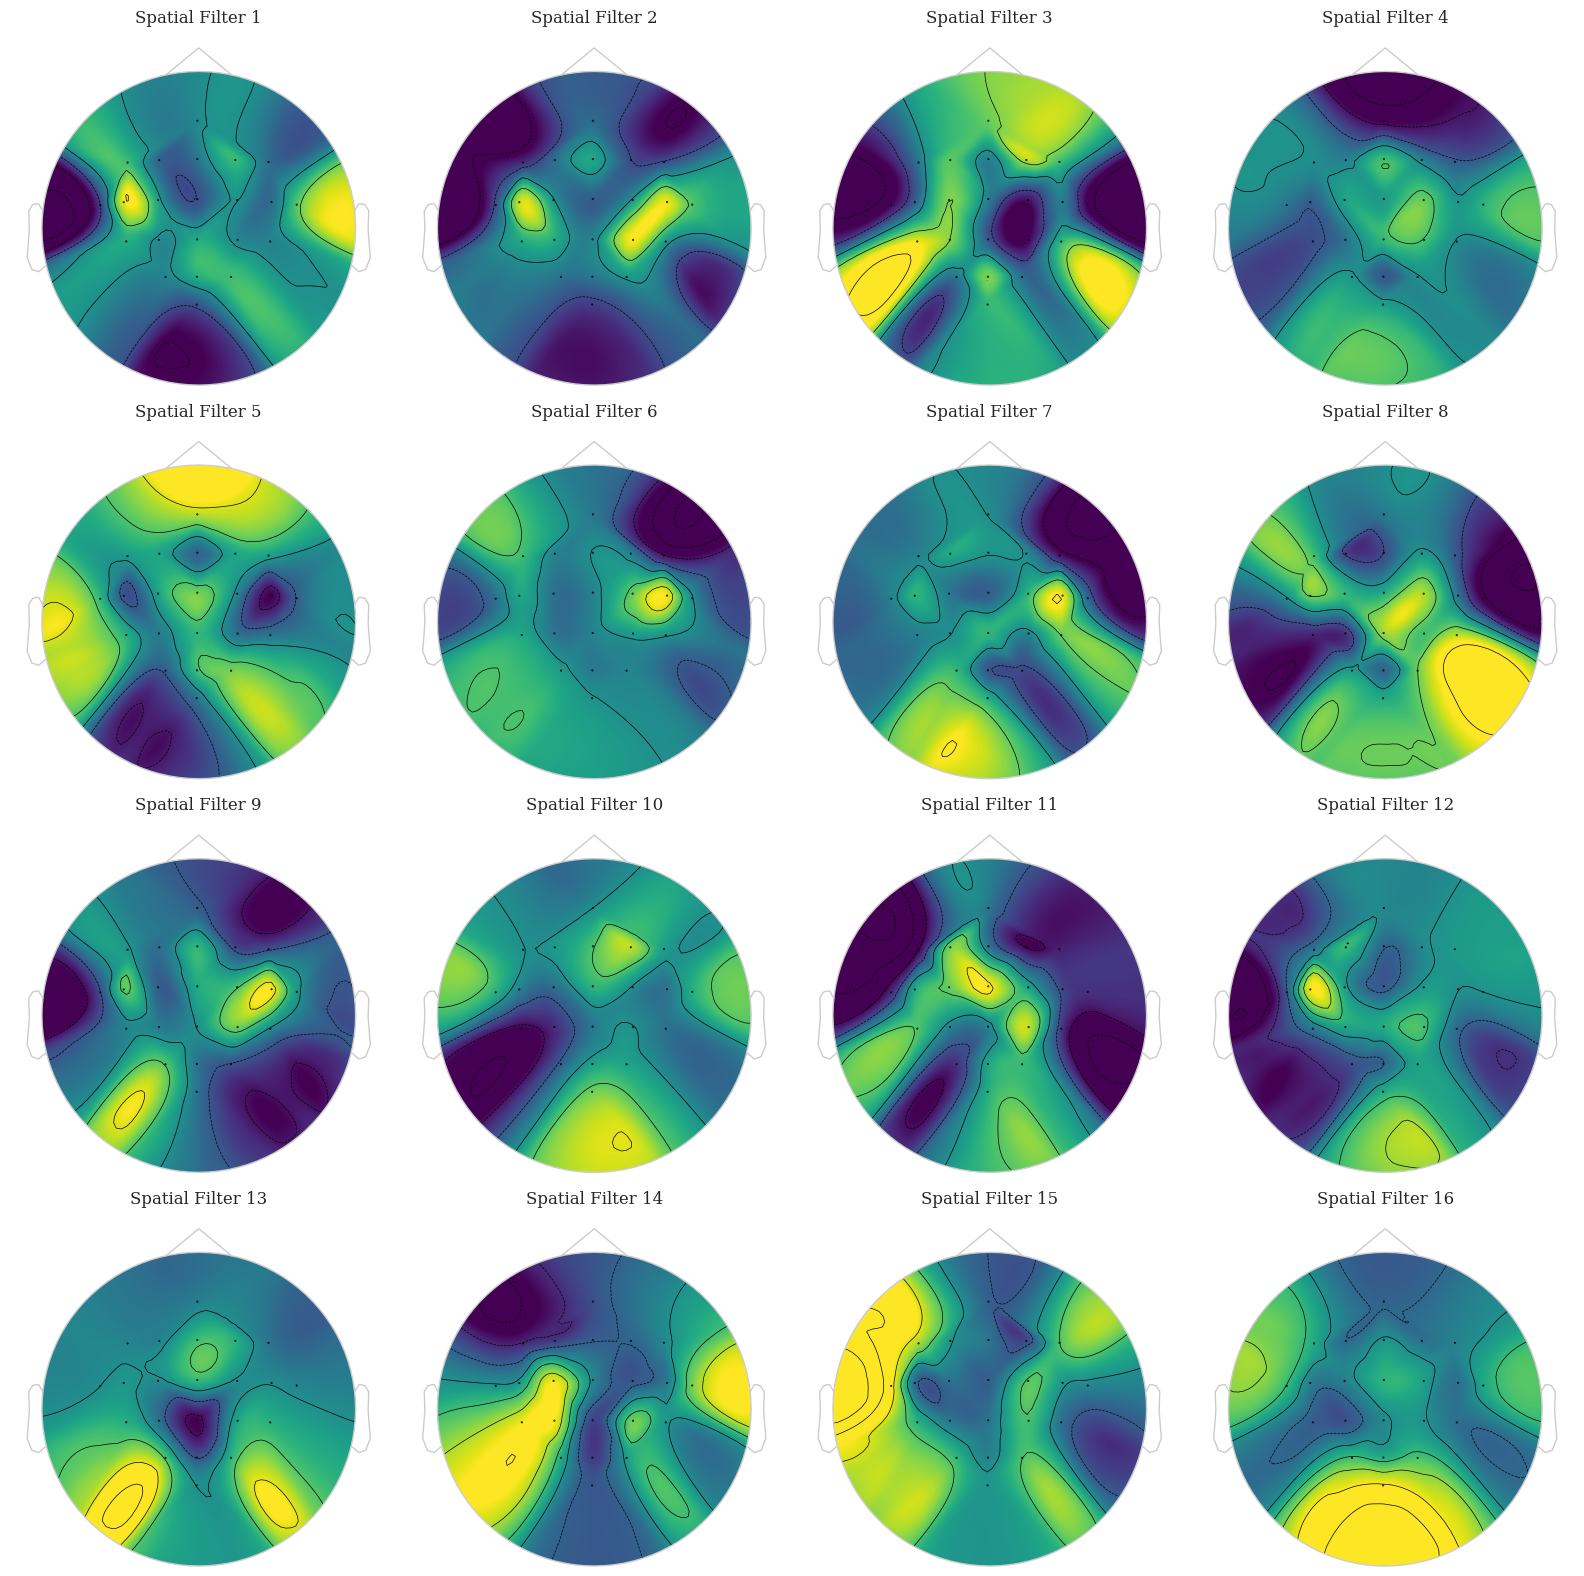

In [12]:
plot_spatial_filters(best_model)

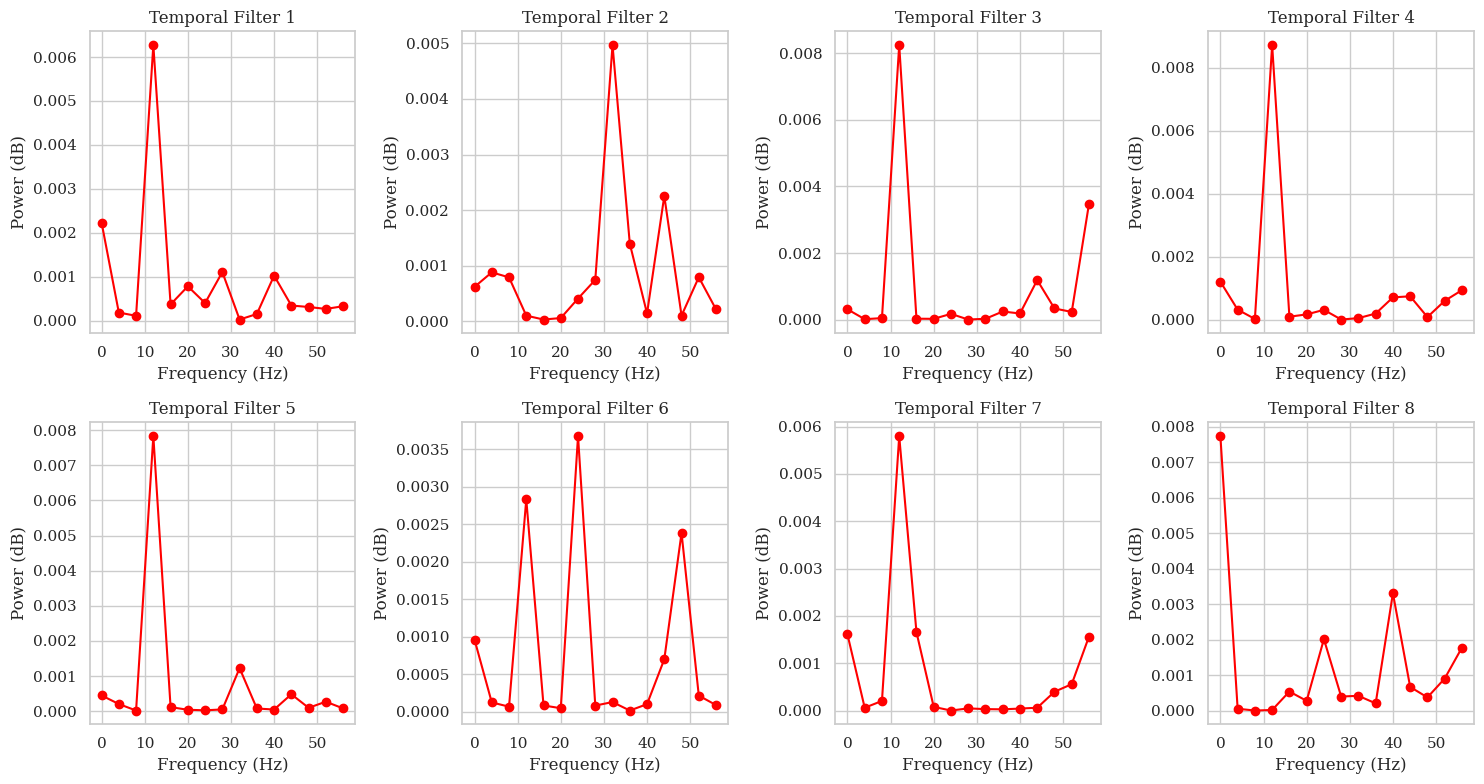

In [13]:
plot_power_spectra_of_temporal_filters(best_model)